#### 1.- Librerías utilizadas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.- Carga de datos

In [ ]:
df = sns.load_dataset("titanic")

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


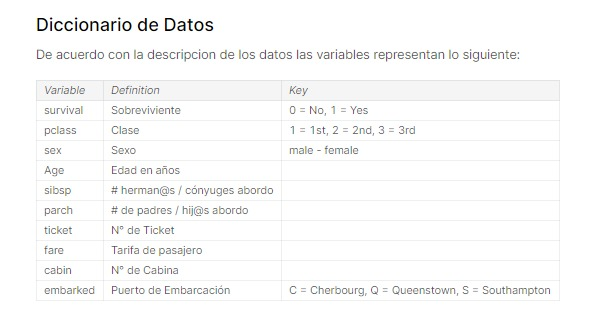

#### 3.- Manipulación de datos

In [ ]:
df.shape

(891, 15)

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
#Eliminamos la variables deck porque no conocemos su significado
df.drop(['deck'], axis=1, inplace=True)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True


Especificaciones del Caso Práctico - Titanic:

A partir del caso presentado, se solicita lo siguiente:

Entregable:

1) Entendimiento de Datos:
   - 5 insights o hallazgos relevantes del caso de uso

2) Tratamiento de datos:
   - Reducir la dimensionalidad en caso sea necesario
   - Aplicar un cambio de distribución de la variable numérica en caso sea necesario
   - Convertir variables categóricas a numericas
   - Seleccionar variables + importantes

#### 4.Entendimiento de Datos

##### 4.1. Variables cuantitativas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [ ]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
import missingno as msno

<Axes: >

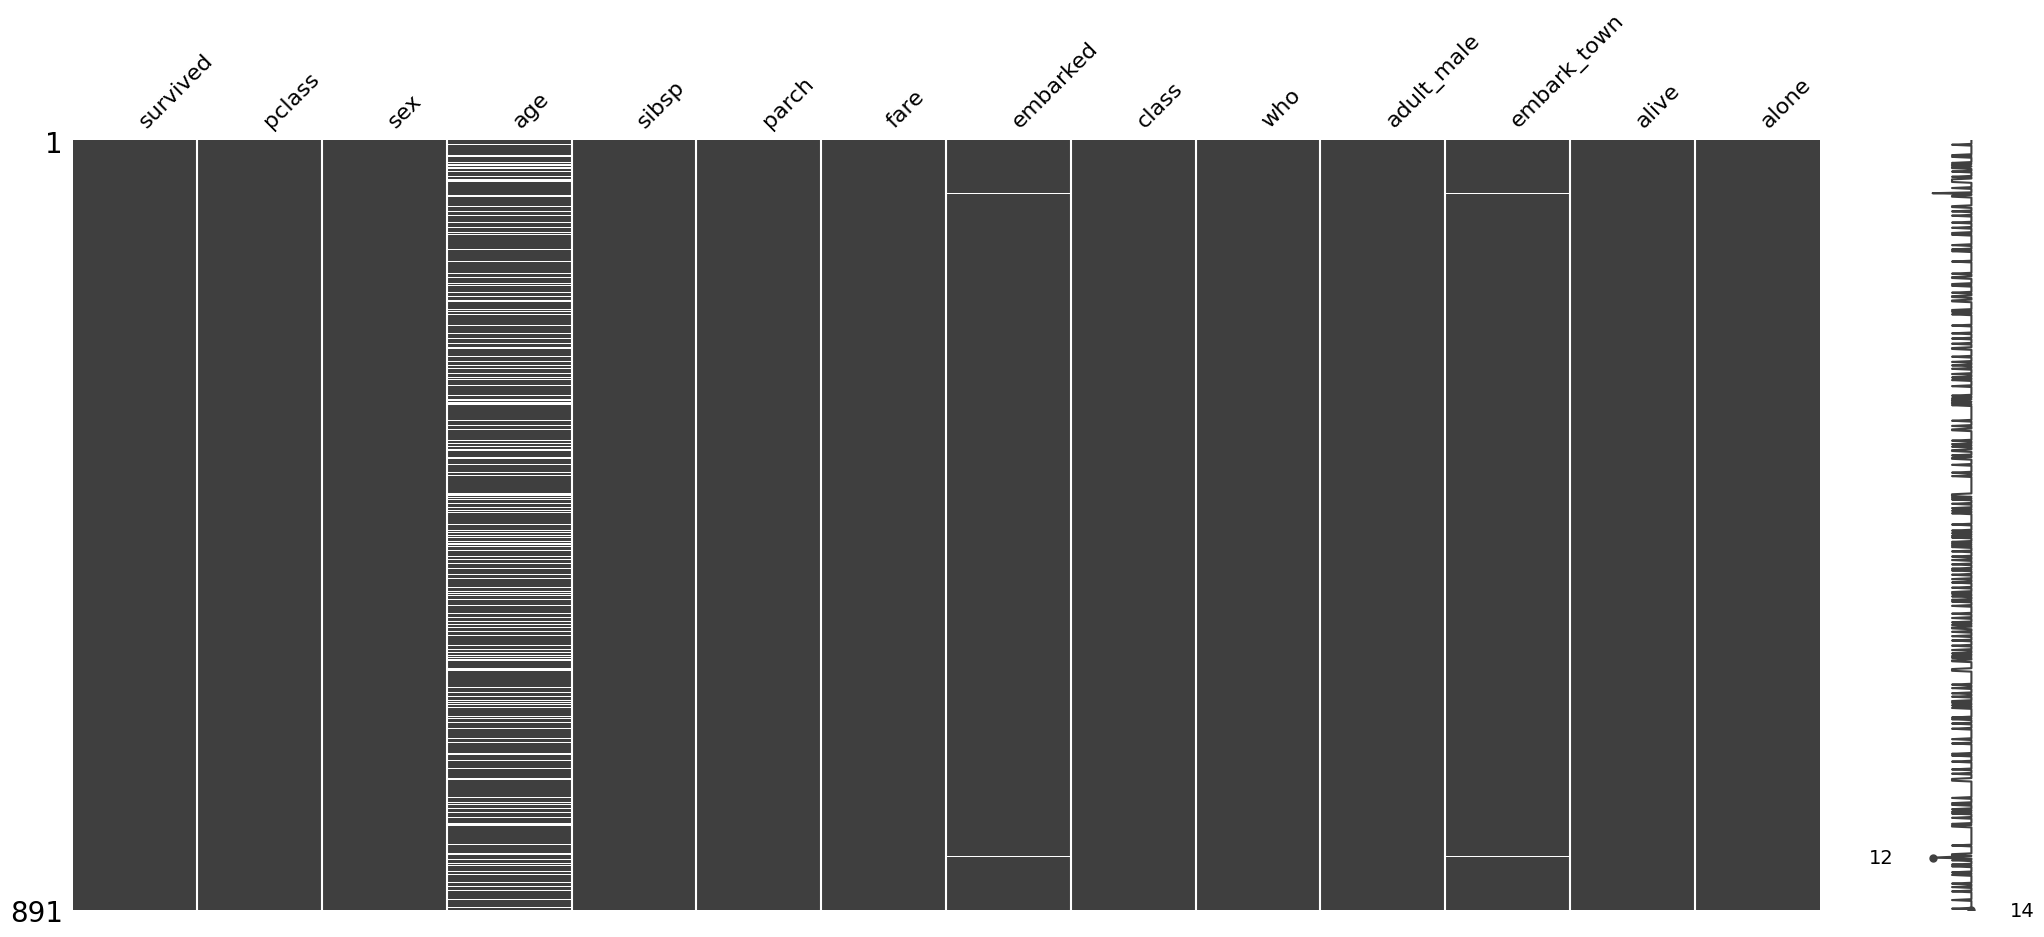

In [ ]:
#Analizamos los valores nulos de Age y Embark
msno.matrix(df)

Hallazgo 1: La variable AGE se debe imputar, en cambio la variable DECK debemos eliminarla porque son solo 2 registros

<bound method Series.sort_index of 0    0.616162
1    0.383838
Name: survived, dtype: float64>

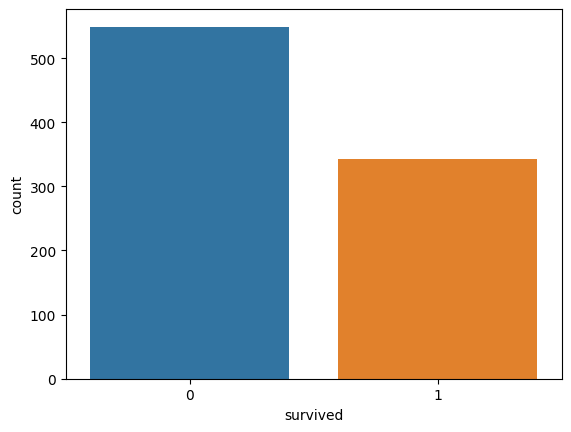

In [ ]:
#Realizamos la distribución de la variables Target
sns.countplot(data = df, x = "survived")
df['survived'].value_counts(1).sort_index

Hallazgo 2: De todos los tripulantes que se encontraban en el Titanic, el 38% de personas ha sobrevivido

In [ ]:
#Calculamos las principales medidas estadísticas
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Hallazgo 3:

- De la variable "age", el promedio es **mayor** que su desviación por lo que no existe valores atipicos extremos.

- La variable parch tiene un gran cantidad de valores nulos, más del 75%.

- De la variable "fare", el promedio es **menor** que su desviación --> existe valores atipicos

In [ ]:
Variables = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

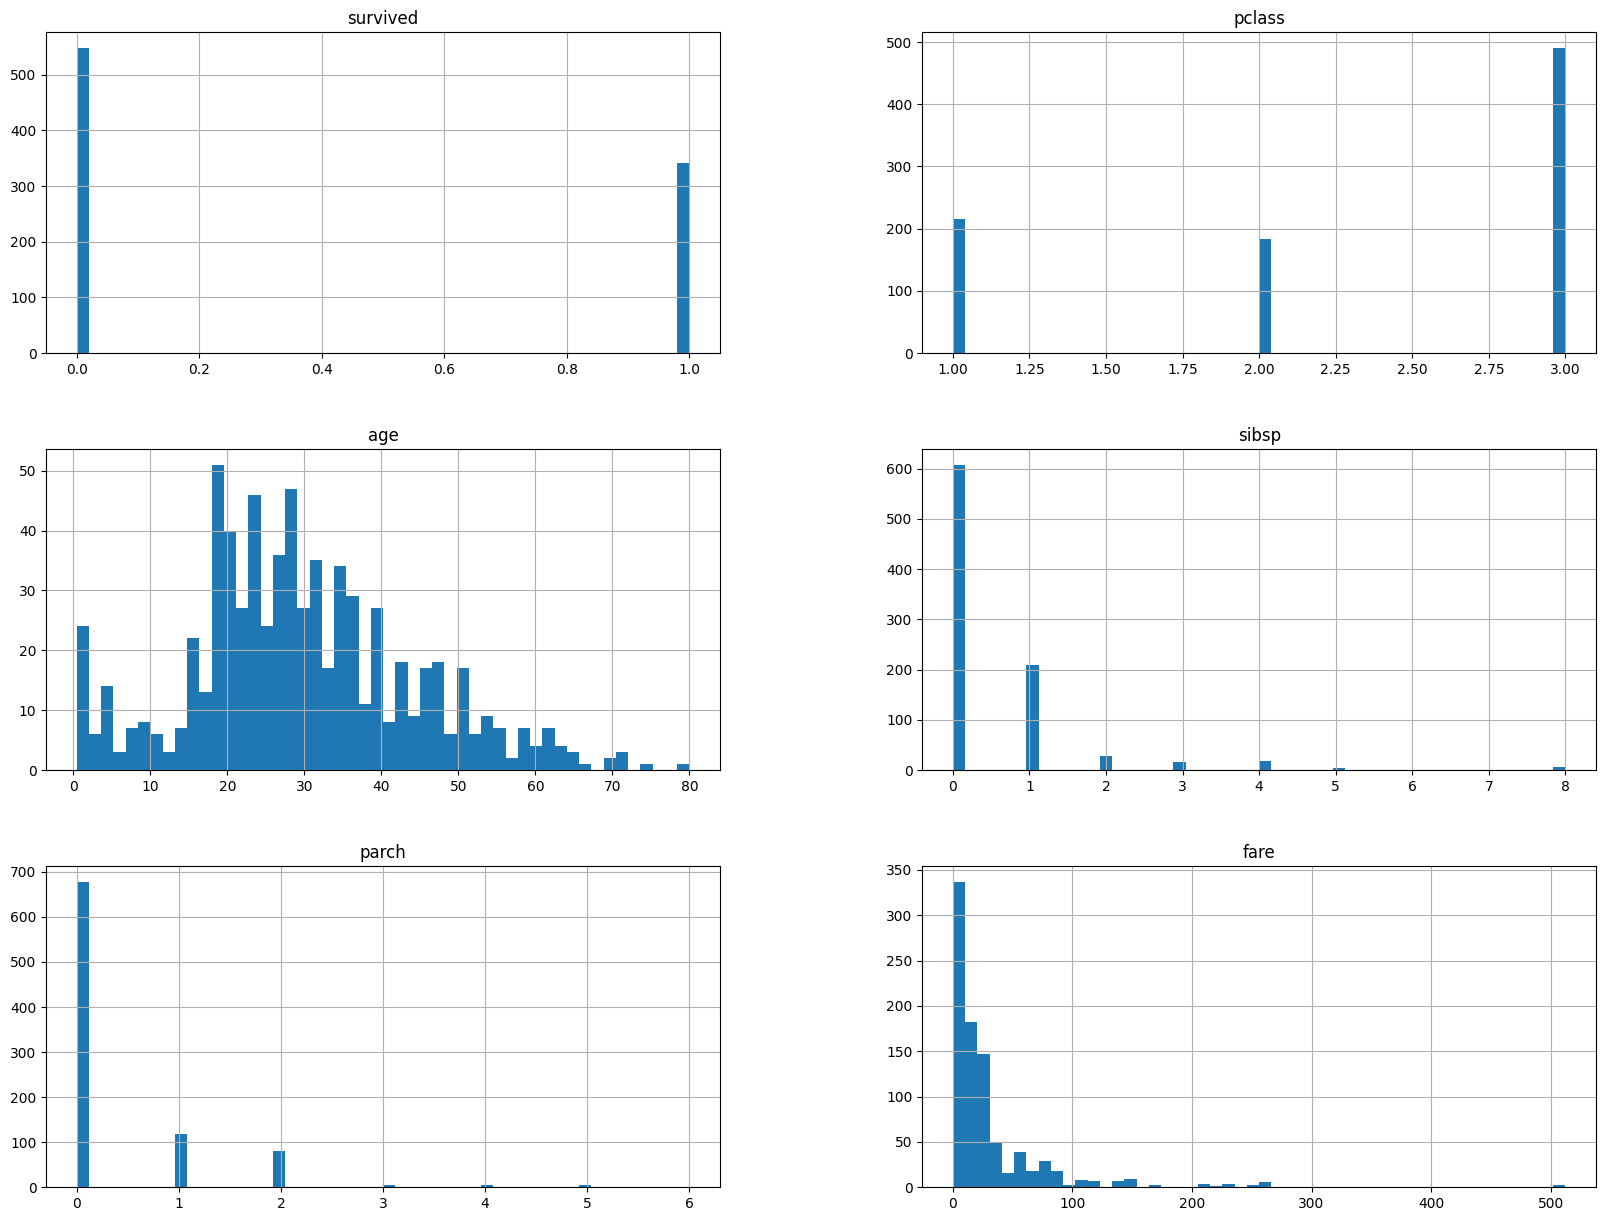

In [ ]:
#Calculamos la distribción de las variables numéricas
df[Variables].hist(bins = 50, figsize=(20,15))
plt.show()

<Axes: >

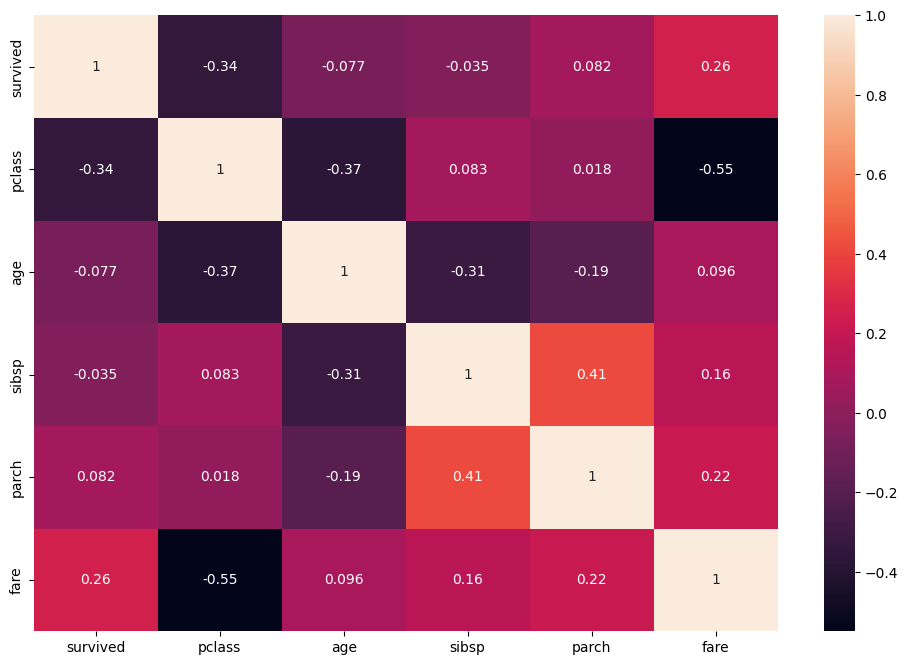

In [ ]:
#Calculamos la correlación variables numéricas
corr = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

Hallazgo 4:

- Las variables numéricas que tiene más correlación con el target(sobrevivientes) son: fare (+) y pclass (-).

##### 4.2. Variables categóricas

In [ ]:
categorical_attributes = df.select_dtypes(include=['object'])

In [ ]:
categorical_attributes.dtypes

sex            object
embarked       object
who            object
embark_town    object
alive          object
dtype: object

In [ ]:
df[['sex','survived']].groupby('sex').agg(['count','sum','mean'])

survived               
          count  sum      mean
sex                           
female      314  233  0.742038
male        577  109  0.188908

Hallazgo 5: Del total de sobrevivientes que representa un 38% de del total de tripulantes, podemos afirmar que aumenta a 74% (+36pp) si solo analizamos a la mujeres y cae a 19% (-19pp) si solo analizamos a los hombres.

In [ ]:
df[['class','survived']].groupby('class').agg(['count','sum','mean'])

survived               
          count  sum      mean
class                         
First       216  136  0.629630
Second      184   87  0.472826
Third       491  119  0.242363

Hallazgo 6: Los tripulantes de 1ra clase tuvieron un % mayor de sobrevivientes con un 63%, mientras que los de 2da clase fueron el 47% y 3ra clase, el 24% de sobrevivientes.

In [ ]:
df[['embark_town','survived']].groupby('embark_town').agg(['count','sum','mean'])

survived               
               count  sum      mean
embark_town                        
Cherbourg        168   93  0.553571
Queenstown        77   30  0.389610
Southampton      644  217  0.336957

Hallazgo 7: Salvo los tripulantes de "Cherbourg" que obtuvieron el 55% de sobrevivientes, las demás categorías están cercanas al % total (38%)

#### 5. Tratamiento de Datos

- Reducir la dimensionalidad en caso sea necesario
- Aplicar un cambio de distribución de la variable numérica en caso sea necesario para reducir los outliers extremos
- Convertir variables categóricas a numericas
- Seleccionar variables + importantes


##### 5.1 Aplicar un cambio de distribución de la variable numérica para reducir los outliers extremos

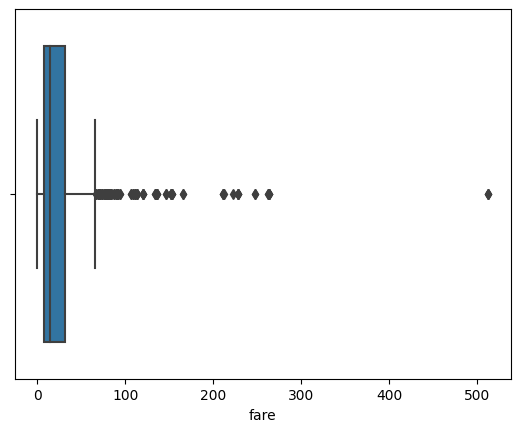

In [ ]:
#fare
sns.boxplot(data=df,x='fare')
plt.show()

In [ ]:
df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [ ]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    return(x)

In [ ]:
df_tratamiento = df[['fare']].apply(lambda x: outlier_capping(x))

In [ ]:
df = pd.concat([df.drop(columns = ['fare']),df_tratamiento],axis = 1)

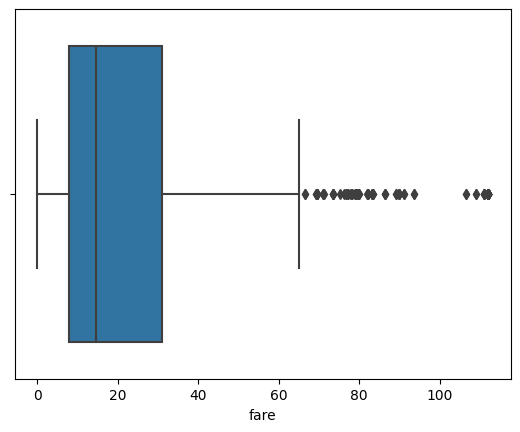

In [ ]:
#fare aplicando el topeo al percentil 95
sns.boxplot(data=df,x='fare')
plt.show()

In [ ]:
df['fare'].describe()

count    891.000000
mean      27.720486
std       29.225083
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      112.079150
Name: fare, dtype: float64

##### 5.2 Imputar los valores nulos

In [ ]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [ ]:
df['age'] = df['age'].fillna(30)

In [ ]:
df['age'].describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [ ]:
df = df.dropna()

##### 5.3 Recategorizar las variables numéricas

In [ ]:
# Recategorización de variables:
df.loc[ df['age'] <= 18, 'ageEncoded'] 					       = 0 # menores de edad
df.loc[(df['age'] > 18) & (df['age'] <= 26), 'ageEncoded'] = 1 # jovenes
df.loc[(df['age'] > 26) & (df['age'] <= 35), 'ageEncoded'] = 2 # Joven Adulto
df.loc[(df['age'] > 35) & (df['age'] <= 50), 'ageEncoded'] = 3 # Adulto
df.loc[(df['age'] > 50) & (df['age'] <= 65), 'ageEncoded'] = 4 # Adulto Maduro
df.loc[ df['age'] >=66, 'ageEncoded'] 					       = 5 # Anciano (Adulto Mayor)

<ipython-input-82-ea164b3bb6c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ df['age'] <= 18, 'ageEncoded'] 					       = 0 # menores de edad


In [ ]:
# Fare
df.loc[ df['fare'] <= 7, 'fareEncoded'] 					       = 0 # Más baratos
df.loc[(df['fare'] > 7) & (df['fare'] <= 14), 'fareEncoded'] = 1 # menos caros
df.loc[(df['fare'] > 14) & (df['fare'] <= 31), 'fareEncoded'] = 2 # caros
df.loc[df['fare'] > 31, 'fareEncoded'] = 3 # Más caros

<ipython-input-83-894990442a83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ df['fare'] <= 7, 'fareEncoded'] 					       = 0 # Más baratos


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,embark_town,alive,alone,fare,ageEncoded,fareEncoded
0,0,3,male,22.0,1,0,S,Third,man,True,Southampton,no,False,7.2500,1.0,1.0
1,1,1,female,38.0,1,0,C,First,woman,False,Cherbourg,yes,False,71.2833,3.0,3.0
2,1,3,female,26.0,0,0,S,Third,woman,False,Southampton,yes,True,7.9250,1.0,1.0
3,1,1,female,35.0,1,0,S,First,woman,False,Southampton,yes,False,53.1000,2.0,3.0
4,0,3,male,35.0,0,0,S,Third,man,True,Southampton,no,True,8.0500,2.0,1.0


##### 5.4 Convertir variables categóricas a numerica

In [ ]:
# sex
df['sexEncoded'] = df['sex'].map( {'female': 1, 'male': 2} ).astype(int)

In [ ]:
# tipo de embarque
df['embarkedEncoded'] = df['embark_town'].map( {'Southampton': 1, 'Cherbourg': 2, 'Queenstown': 3} ).astype(int)

##### 5.5 Selección de variables

In [ ]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,embark_town,alive,alone,fare,ageEncoded,fareEncoded,sexEncoded,embarkedEncoded
0,0,3,male,22.0,1,0,S,Third,man,True,Southampton,no,False,7.2500,1.0,1.0,2,1
1,1,1,female,38.0,1,0,C,First,woman,False,Cherbourg,yes,False,71.2833,3.0,3.0,1,2
2,1,3,female,26.0,0,0,S,Third,woman,False,Southampton,yes,True,7.9250,1.0,1.0,1,1


In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked',
       'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone', 'fare',
       'ageEncoded', 'fareEncoded', 'sexEncoded', 'embarkedEncoded'],
      dtype='object')

In [ ]:
drop_elements = ['sex','pclass', 'age','fare','embarked', 'class', 'who','adult_male', 'embark_town', 'alive', 'alone']
df_encoded = df.drop(drop_elements, axis = 1)

In [ ]:
df_encoded.head(3)

,survived,sibsp,parch,ageEncoded,fareEncoded,sexEncoded,embarkedEncoded
0,0,1,0,1.0,1.0,2,1
1,1,1,0,3.0,3.0,1,2
2,1,0,0,1.0,1.0,1,1


In [ ]:
from sklearn.feature_selection import SelectKBest

X=df_encoded.drop(['survived'], axis=1)
y=df_encoded['survived']

best=SelectKBest(k=6)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['sibsp', 'parch', 'ageEncoded', 'fareEncoded', 'sexEncoded',
       'embarkedEncoded'],
      dtype='object')
